# 1 hash (h1) for Main Title (i.e., dont use) 
## 2 hashes (h2) for Topic (e.g., Data Preparation)
### 3 hashes (h3) for sub-topic (e.g., under Data Preparation, should have a 3 hash called maybe "Importing Data"
#### 4 hashes (h4) for findings, analysis etc
No hash for explanations/comments

#### To standardize formating. 
#### Add more if anything to take note! DELETE AT THE END.
`USE THIS THINGY for variable names`

Anything to note WRITE HERE:


#### ROUGH PLAN
0) Library Setup

1) Data Description/Explanation or something (in place of Sample Collection). *Practical Motivation

2) Data Preparation. *Problem Formulation (im thinking we do this in 1.)

2.1 Data Cleaning

2.2 Feature Engineering... etc

3) Exploratory Data Analysis

4) Might Do Data Cleaning etc again depending on what we find in EDA

5) Modelling

6) Optimization (choose best performing model, use Grid search, etc.)

7) Findings/Conclusions?

8) References


## <u><center>ANYTHING BELOW THIS IS THE ACTUAL NOTEBOOK!</center></u>
-------------------------------------------------------------------------------------------------------------------------------------------------------

#### SC1015 FCSA Group 1: 
- Gay Ming Kai       (C230114@e.ntu.edu.sg)
- Jacob Ong Jia Chun (JONG163@e.ntu.edu.sg)
- Lim Zu Liang       (E230184@e.ntu.edu.sg)

<h1><center><u>Adult Census Income</u></center></h1>

// this will be the Table of contents. Do last.

## Chapter 0. Library Setup

In [1]:
def separate():
    print('*' * 40)

print("Data Analysis and Wrangling Packages")
import pandas as pd # Library for data processing and analysis.
import numpy as np # Library for numerical computing (provides support for multi-dimensional arrays and matrices).
import scipy as sp # Library for scientific computing and advanced mathematics.
print("- pandas version: {}". format(pd.__version__))
print("- NumPy version: {}". format(np.__version__))
print("- SciPy version: {}". format(sp.__version__)) 
separate()
print("Visualization Packages")
import matplotlib as plt # Plotting library
import seaborn as sns  # Statistical data visualization based on matplotlib
print("- matplotlib version: {}".format(plt.__version__))
print("- seaborn version: {}".format(sns.__version__))
separate()

print("Modelling Packages")
import sklearn as sk # Collection of machine learning algorithms.
print("- scikit-learn version: {}". format(sk.__version__))
separate()

Data Analysis and Wrangling Packages
- pandas version: 2.0.3
- NumPy version: 1.24.3
- SciPy version: 1.11.1
****************************************
Visualization Packages
- matplotlib version: 3.7.2
- seaborn version: 0.12.2
****************************************
Modelling Packages
- scikit-learn version: 1.3.0
****************************************


## Chapter 1. Dataset Overview

#### The dataset `(https://archive.ics.uci.edu/ml/datasets/Adult)` was donated by Ronny Kohavi and Barry Becker in 1994 and is currently managed by the University of California Irvine.

The dataset has 1 target, 14 features, and 32561 instances, 

The 14 features are: 
- `age`
- `workclass`
- `fnlwgt`
- `education`
- `education-num`
- `marital-status`
- `occupation `
- `relationship`
- `race`
- `sex`
- `capital-gain`
- `capital-loss`
- `hours-per-week`
- `native-country`

The target is `income`.

#### General Note:
- Text-based values have an additional space in front (e.g., `sex` --> " Male").

#### Data Preparation Note:
- The dataset noted that there are missing values in 3 features: `workclass`, `occupation`, and `native-country`.
- A thorough examination of all other features is still necessary for potential missing values.
- After identifying the missing values, we will rectify them in Data Preparation.

#### Exploratory Data Analysis Note:
- The feature `fnlwgt`, short for "Final Weight," denotes an estimated count of individuals represented by each row in the dataset. For instance, a given row might have `fnlwgt` = 2500, `age` = 50, `race` = " White", `sex` = " Female", indicating that approximately 2500 people share these characteristics. Given this interpretation, the `fnlwgt` feature is essentially a cardinal number representing group size and is logically independent of the target label. To verify this assumption, we intend to conduct an analysis (in Exploratory Data Analysis) to assess whether `fnlwgt` influences the target or not.
- The feature `education-num` seems to correspond to the numerical representation of the `education` feature. This means that each value in `education` is mapped to a corresponding numerical value in `education-num`. For instance, "HS-grad" in `education` might be represented as 9 in `education-num`. We will confirm this in Exploratory Data Analysis.  

#### Feature Engineering Note:
- If our analysis confirms that `fnlwgt` has no significant impact on the target label, we will drop the feature.
- 
Similarly, if our analysis confirm that `education-num` is derived from `education`,  indicating redundancy, we will remove one of the features during the Feature Engineering process. Given that machine learning models generally perform better with numerical data, we will choose to drop `education` over `education-num`.

## Chapter 2. Problem Formulation

Points to talk about:
- Intro, overview,
- what does this predict?
- why do we want to predict this?
- more?
- What do we want to learn out of this?
- what can this be a stepping stone for (maybe something like we can predict Singapore's blabla...

Utilize census (survey) data to forecast whether the earnings of a particular demographic surpass $50k annually.
problem statement: Predict whether the income of a specific group of people exceeds $50K/yr or not based on census (survey) data. 
This problem is a binary classification problem.

Yappalogy here, To BE DONE.

## Chapter 3. Data Preparation

### 3.1 Import Dataset as Dataframe

In [2]:
# Aquiring data.

# Reading a .data file (that does not have headers) into DataFrame.
adult_data = pd.read_csv('data/adult.data', delimiter=",", header=None) 

# Since the dataset file does NOT provide the headers, we have to add them in ourselves.
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
                "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
                "hours-per-week", "native-country", "income"]

# Assign column names to DataFrame.
adult_data.columns = column_names

# Check & First look.
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 3.2 Identify and Remove Missing Values

In [3]:
# Look for NULL (missing) values in the dataset.
adult_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Findings:
- Appears to not have any null/missing values, but Dataset Overview mentioned that missing values exists.
- Missing values may be replaced with a representative value (e.g., "MISSING").

#### Choices:
- Option A: Peek at the data specifically to look for missing values.
- Option B: Find all the possible values of the three features (categorical) that are said to have missing data.

#### Perform:
- Option B as it is more robust (merely peeking head and tail may not show us the missing data).

In [4]:
# Option B.
print(adult_data["workclass"].value_counts())
separate()
print(adult_data["occupation"].value_counts())
separate()
print(adult_data["native-country"].value_counts())
separate()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
****************************************
occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64
****************************************
native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         1

#### Findings:
- It seems that missing values are denoted as " ?".

#### Perform
- Check for the presence of missing values in all features.

In [5]:
# Check all presence and count of " ?" in the dataset.
def check_missing():
    print("Number of \" ?\" in:\n")
    print("Column", 11*' ', "Count")
    print("-"*25)
    for i in adult_data.columns: 
        t = adult_data[i].value_counts() 
        index = list(t.index)
        print(i, end="")
        # For styling purposes.
        x = 20 - len(i) 
        for j in index:
            temp = 0
            if j == " ?":
                # Once a '?' is found, print the number of '?' in the feature.
                print (x * ' ', t[" ?"]) 
                temp = 1
                break
        if temp == 0:
            # '?' is absent from all rows of a specific feature.
            print (x * ' ', "0") 
    separate()
    print("Row count: ", len(adult_data))
    separate()
check_missing()

Number of " ?" in:

Column             Count
-------------------------
age                  0
workclass            1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       583
income               0
****************************************
Row count:  32561
****************************************


#### Findings:
- Just like what the dataset said, only `workclass`, `occupation`, and `native-country` contains missing data.
- They are all categorical features (replacing with mean or median is not viable).

#### Choices:
- Option A: Remove rows containing missing data.<br>
There are a maximum of 4262 missing data points (assuming no overlaps), which comprise about 13% of the total dataset.

- Option B: Remove the columns that contain missing data (`workclass`, `occupation`, and `native-country`).<br>
These three features are intuitively crucial and likely to significantly impact the target `income`.
 
- Option C: Predict missing classification data based on other variables in the dataset using classification models like logistic regression.<br>
Viable but can be inaccurate and time-consuming.
  
- Option D: Impute missing data using the respective features' mode.<br>
It might skew the data and affect the model's prediction in later parts.

#### Perform:
- Option A. <br>Given that we have 14 features, even after removing the missing values, we would still have approximately 28 thousand data points, which is more than sufficient for reliable analysis and prediction. and prediction.

In [6]:
# Option A.
adult_data = adult_data.drop(adult_data[
                             (adult_data["workclass"] == " ?") | 
                             (adult_data["occupation"] == " ?") | 
                             (adult_data["native-country"] == " ?")].index)

# Check if successfully removed.
check_missing()

Number of " ?" in:

Column             Count
-------------------------
age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income               0
****************************************
Row count:  30162
****************************************


### 3.3 Peeks and Checks

In [7]:
# Check features' datatypes.
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [8]:
# Basic statistical information of the numerical features. 
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Basic statistical information of the catergorical features.
adult_data[["workclass","education","marital-status","occupation","relationship","race","sex","native-country", "income"]].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30162,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22286,9840,14065,4038,12463,25933,20380,27504,22654


In [10]:
# Peek first 5 rows.
adult_data.head(5) 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# Peek last 5 rows.
adult_data.tail() 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


#### Findings:
- Features `age`, `education-num`, `fnlwgt`, `capital-gain`, `capital-loss`, `hours-per-week` are numerical.
- Features `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `native-country` are categorical.
- Feature `sex` and target `income` are dichotomous/binary (also categorical).

#### Feature Engineering Note:
- Encode all categorical columns to numerical nominal values as machine learning algorithms work better with numerical values.
- Feature `sex` and target `income` can be converted to binary (1 or 0).
- Could potentially bin the numerical features.

## Chapter 4. Exploratory Data Analysis

### 4.1. Exploring the Response

C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


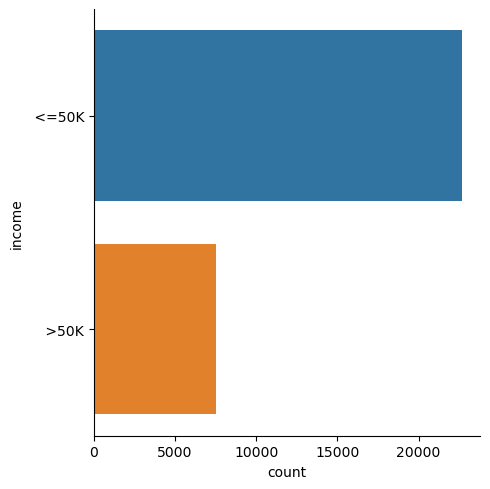

In [12]:
sns.catplot(y = 'income', data = adult_data, kind = "count")

In [13]:
print("Number of data in each Count catergory:\n")
print("Income", 11*' ', "Counter")
print("-"*25)
adult_data_gb = adult_data.groupby('income')
i = "Income >= 50000"
print(i, end="")
x = 20 - len(i) # For styling purposes
print (x * ' ', adult_data_gb['income'].count().iloc[0])
i = "Income < 50000"
print(i, end="")
x = 20 - len(i) # For styling purposes
print (x * ' ', adult_data_gb['income'].count().iloc[1])

Number of data in each Count catergory:

Income             Counter
-------------------------
Income >= 50000      22654
Income < 50000       7508


#### Findings
- Data is more concentrated towards >= 50k

### 5.2. Exploring the Numerical Predictors

#### 5.2.1. age

Important Data for age 

Descriptor         Value
-------------------------
Mean               38.44
Std                13.13
Q1                 28.0
Median             37.0
Q3                 47.0
Outliers           169


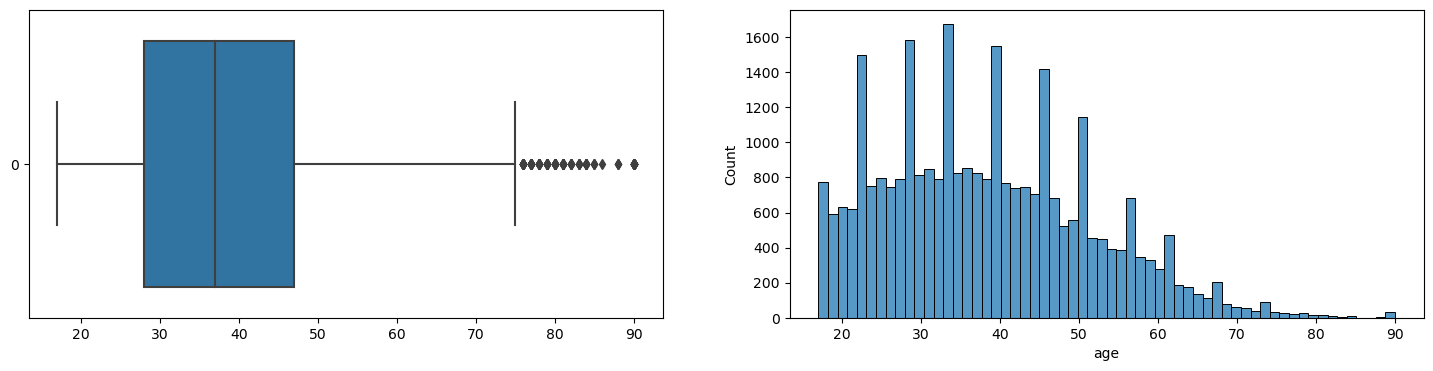

In [14]:
def print_numerical_predictor(n_p):
    #Print the graph
    f, axes = plt.pyplot.subplots(1, 2, figsize=(18, 4))
    sns.boxplot(data = adult_data[n_p], orient = "h", ax = axes[0])
    sns.histplot(data = adult_data[n_p], ax = axes[1])

    #Finding the outliers
    quad1 = adult_data[n_p].quantile(0.25)
    quad3 = adult_data[n_p].quantile(0.75)
    iqr = quad3 - quad1
    lower_bound = quad1 - 1.5*iqr
    upper_bound = quad3 + 1.5*iqr
    outliers = adult_data[(adult_data[n_p] < lower_bound) | (adult_data[n_p] > upper_bound)].count()[1]

    #Finding the correlation with predictor

    print("Important Data for",n_p,"\n")
    print("Descriptor", 7*' ', "Value")
    print("-"*25)


    i = 'Mean'
    x = 17 - len(i)
    print(i,x * ' ',"%.2f" % adult_data[n_p].describe().iloc[1])

    i = 'Std'
    x = 17 - len(i)
    print(i,x * ' ',"%.2f" % adult_data[n_p].describe().iloc[2])

    i = 'Q1'
    x = 17 - len(i)
    print(i,x * ' ',adult_data[n_p].describe().iloc[4])

    i = 'Median'
    x = 17 - len(i)
    print(i,x * ' ',adult_data[n_p].describe().iloc[5])

    i = 'Q3'
    x = 17 - len(i)
    print(i,x * ' ',adult_data[n_p].describe().iloc[6])

    i = 'Outliers'
    x = 17 - len(i)
    print(i,x * ' ',outliers)
    
print_numerical_predictor('age')

#### 5.2.2. fnlwgt

Important Data for fnlwgt 

Descriptor         Value
-------------------------
Mean               189793.83
Std                105652.97
Q1                 117627.25
Median             178425.0
Q3                 237628.5
Outliers           903


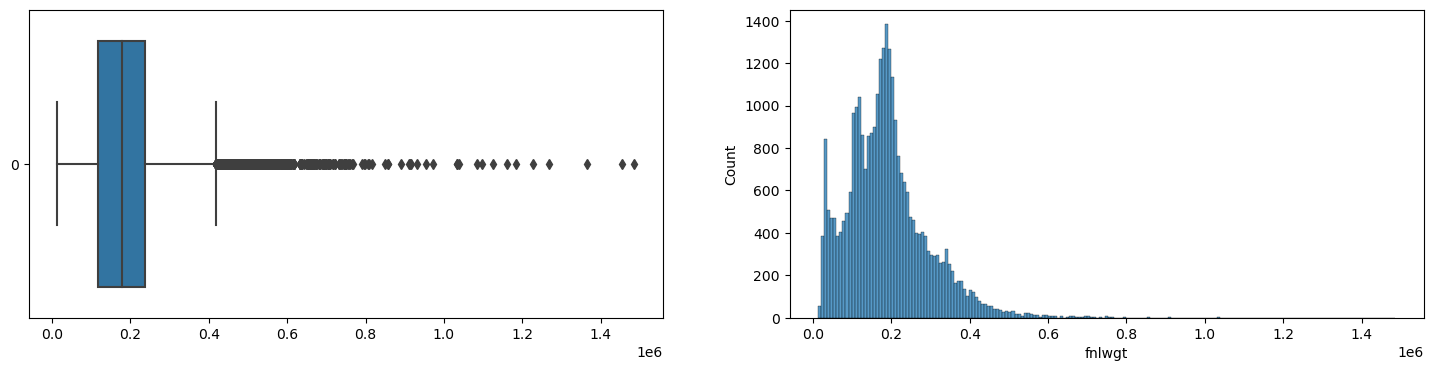

In [15]:
print_numerical_predictor('fnlwgt')

#### 5.2.3. education-num

Important Data for education-num 

Descriptor         Value
-------------------------
Mean               10.12
Std                2.55
Q1                 9.0
Median             10.0
Q3                 13.0
Outliers           196


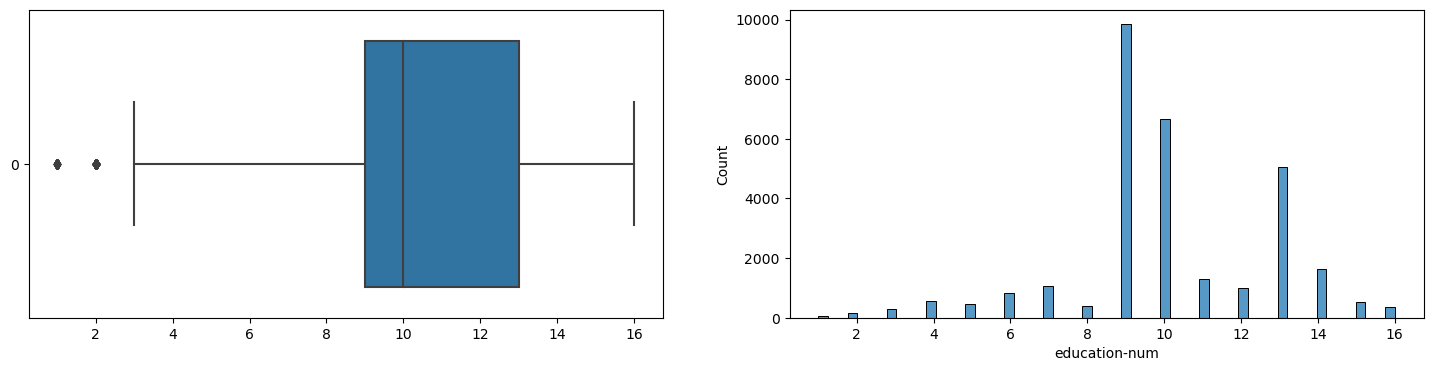

In [16]:
print_numerical_predictor('education-num')

#### 5.2.4. capital-gain

Important Data for capital-gain 

Descriptor         Value
-------------------------
Mean               1092.01
Std                7406.35
Q1                 0.0
Median             0.0
Q3                 0.0
Outliers           2538


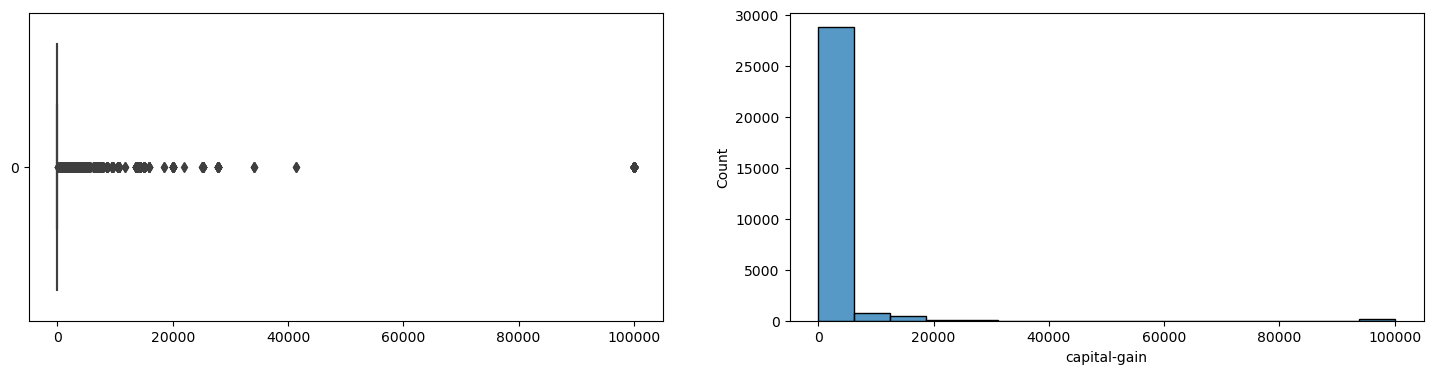

In [17]:
print_numerical_predictor('capital-gain')

#### 5.2.5. capital-loss

Important Data for capital-loss 

Descriptor         Value
-------------------------
Mean               88.37
Std                404.30
Q1                 0.0
Median             0.0
Q3                 0.0
Outliers           1427


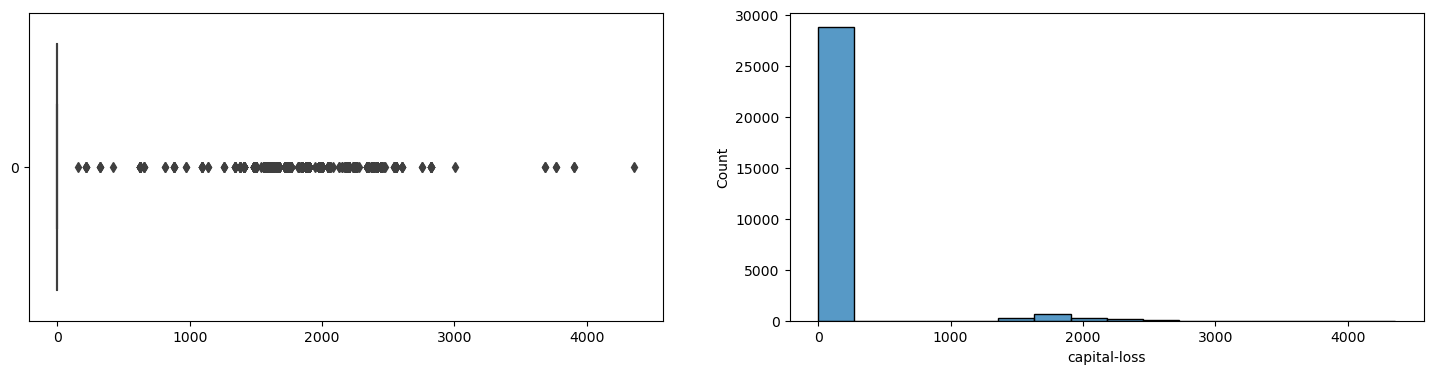

In [18]:
print_numerical_predictor('capital-loss')

#### 5.2.6. hours-per-week

Important Data for hours-per-week 

Descriptor         Value
-------------------------
Mean               40.93
Std                11.98
Q1                 40.0
Median             40.0
Q3                 45.0
Outliers           7953


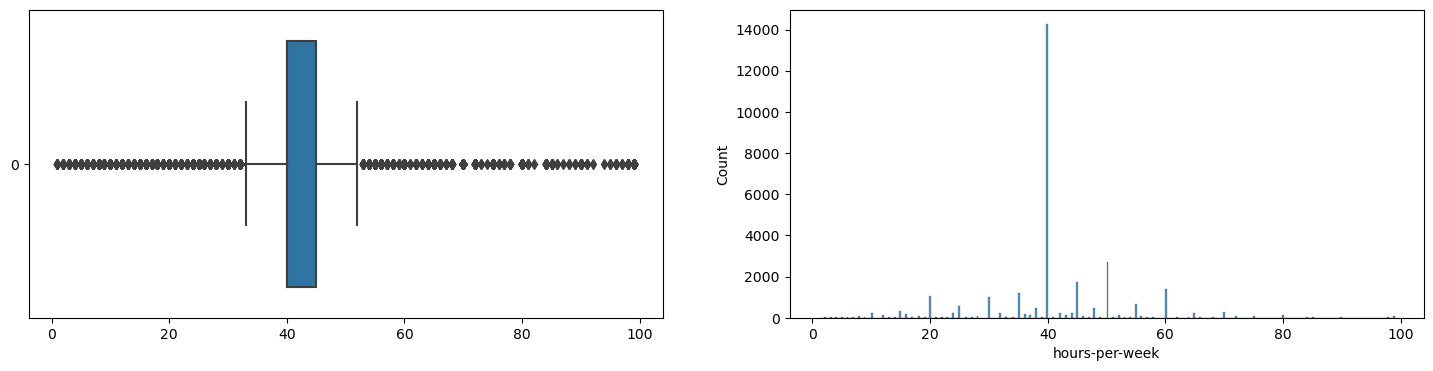

In [19]:
print_numerical_predictor('hours-per-week')

### 5.3. Exploring the Catergorical Predictors

#### 5.3.1. workclass

Number of unique values for workclass 

Unique Values      7 

****************************************
 Label                   Count
------------------------------
 Private                22286
 Self-emp-not-inc       2499
 Local-gov              2067
 State-gov              1279
 Self-emp-inc           1074
 Federal-gov            943
 Without-pay            14


C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


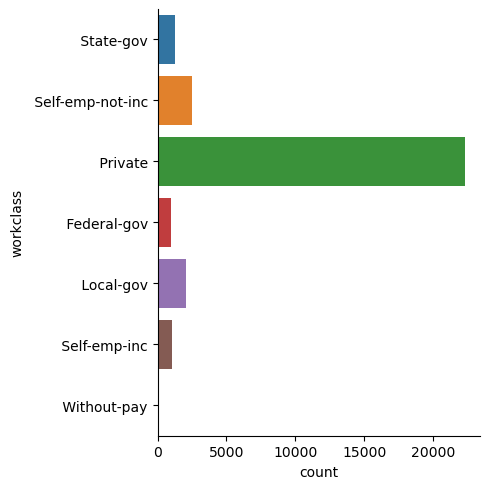

In [20]:
def print_catergorical_predictor(c_p):
    sns.catplot(y = c_p, data = adult_data, kind = "count")
    print("Number of unique values for",c_p,"\n")
    i = 'Unique Values'
    x = 17 - len(i)
    print(i,x * ' ',adult_data[c_p].nunique(),'\n')
    separate()
    print(" Label", 17*' ', "Count")
    print("-"*30)
    ecp_data_value = adult_data[c_p].value_counts().keys().tolist()
    ecp_data_counts = adult_data[c_p].value_counts().tolist()
    
    for ecp_counter in range(len(ecp_data_value)):
        i = ecp_data_value[ecp_counter]
        i = str(i)
        x = 22 - len(i)
        print(i,x * ' ',ecp_data_counts[ecp_counter])
        
print_catergorical_predictor('workclass')

#### 5.3.2. education

Number of unique values for education 

Unique Values      16 

****************************************
 Label                   Count
------------------------------
 HS-grad                9840
 Some-college           6678
 Bachelors              5044
 Masters                1627
 Assoc-voc              1307
 11th                   1048
 Assoc-acdm             1008
 10th                   820
 7th-8th                557
 Prof-school            542
 9th                    455
 12th                   377
 Doctorate              375
 5th-6th                288
 1st-4th                151
 Preschool              45


C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


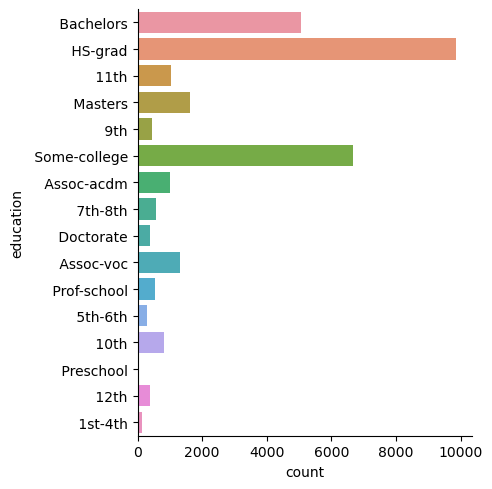

In [21]:
print_catergorical_predictor('education')

#### 5.3.3. marital-status

Number of unique values for marital-status 

Unique Values      7 

****************************************
 Label                   Count
------------------------------
 Married-civ-spouse     14065
 Never-married          9726
 Divorced               4214
 Separated              939
 Widowed                827
 Married-spouse-absent  370
 Married-AF-spouse      21


C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


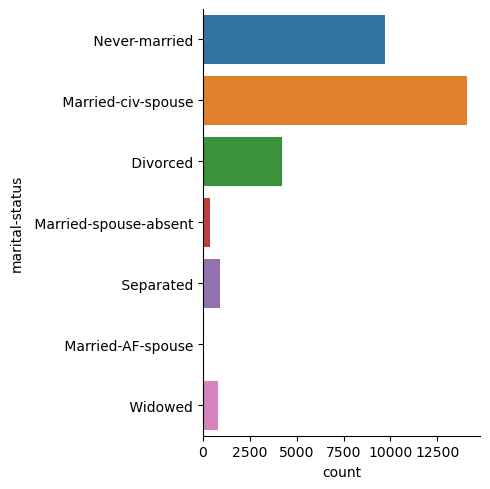

In [22]:
print_catergorical_predictor('marital-status')

#### 5.3.4. occupation

Number of unique values for occupation 

Unique Values      14 

****************************************
 Label                   Count
------------------------------
 Prof-specialty         4038
 Craft-repair           4030
 Exec-managerial        3992
 Adm-clerical           3721
 Sales                  3584
 Other-service          3212
 Machine-op-inspct      1966
 Transport-moving       1572
 Handlers-cleaners      1350
 Farming-fishing        989
 Tech-support           912
 Protective-serv        644
 Priv-house-serv        143
 Armed-Forces           9


C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


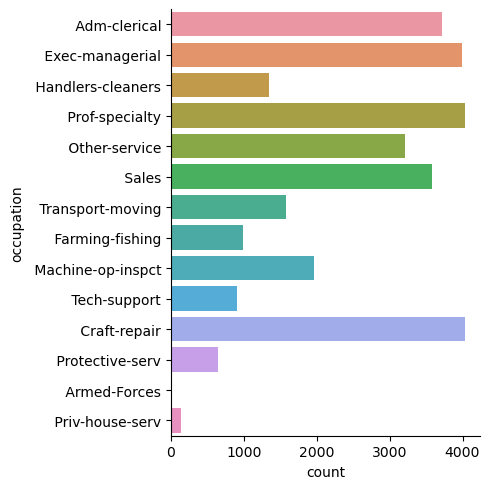

In [23]:
print_catergorical_predictor('occupation')

#### 5.3.5. relationship

C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Number of unique values for relationship 

Unique Values      6 

****************************************
 Label                   Count
------------------------------
 Husband                12463
 Not-in-family          7726
 Own-child              4466
 Unmarried              3212
 Wife                   1406
 Other-relative         889


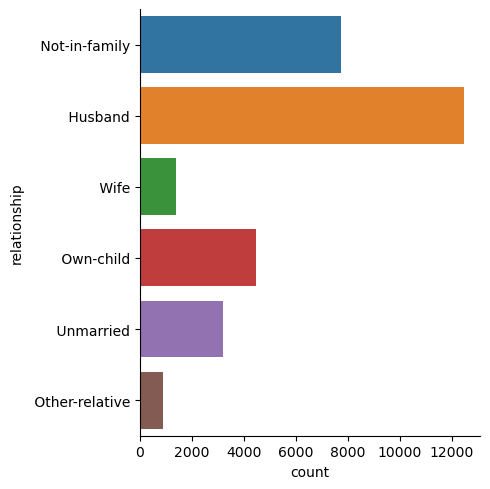

In [24]:
print_catergorical_predictor('relationship')

#### race

Number of unique values for race 

Unique Values      5 

****************************************
 Label                   Count
------------------------------
 White                  25933
 Black                  2817
 Asian-Pac-Islander     895
 Amer-Indian-Eskimo     286
 Other                  231


C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


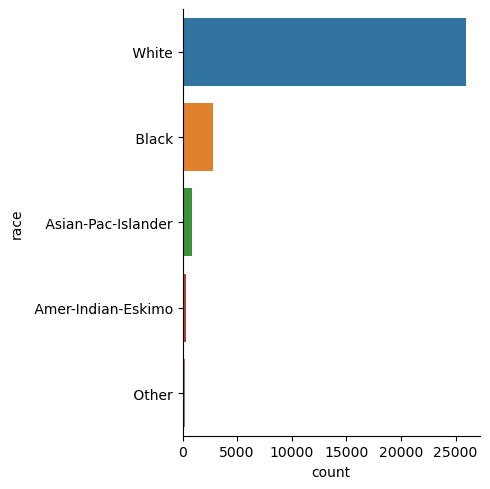

In [25]:
print_catergorical_predictor('race')

#### 5.3.6. sex

C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Number of unique values for sex 

Unique Values      2 

****************************************
 Label                   Count
------------------------------
 Male                   20380
 Female                 9782


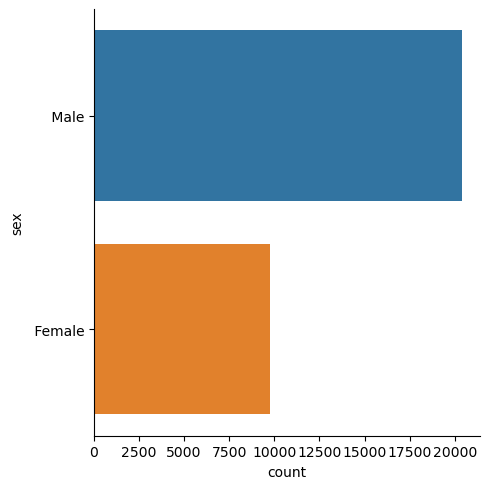

In [26]:
print_catergorical_predictor('sex')

#### 5.3.7. native-country

Number of unique values for native-country 

Unique Values      41 

****************************************
 Label                   Count
------------------------------
 United-States          27504
 Mexico                 610
 Philippines            188
 Germany                128
 Puerto-Rico            109
 Canada                 107
 India                  100
 El-Salvador            100
 Cuba                   92
 England                86
 Jamaica                80
 South                  71
 China                  68
 Italy                  68
 Dominican-Republic     67
 Vietnam                64
 Guatemala              63
 Japan                  59
 Poland                 56
 Columbia               56
 Iran                   42
 Taiwan                 42
 Haiti                  42
 Portugal               34
 Nicaragua              33
 Peru                   30
 Greece                 29
 France                 27
 Ecuador                27
 Ireland                24
 Hong   

C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


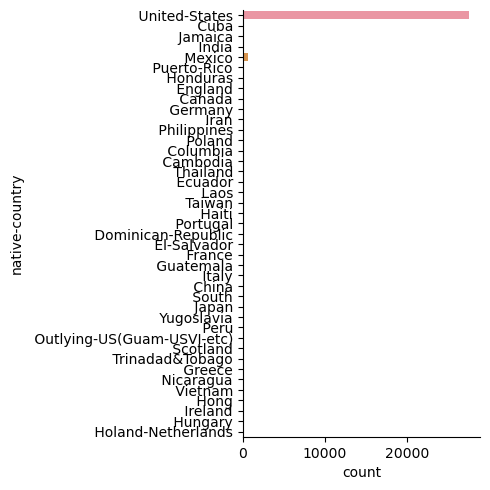

In [27]:
print_catergorical_predictor('native-country')

### 5.4. Relationship Exploration with Predictor

#### 5.4.1. Correlation with Numerical Predictors

<Axes: >

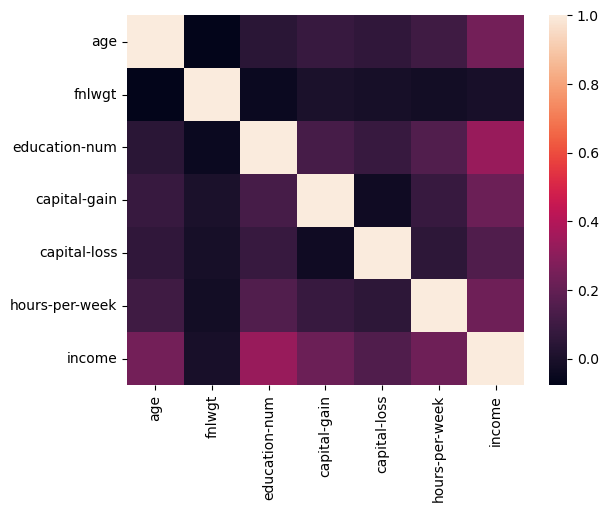

In [28]:
#Mapping income to use correlation
adult_data_corr = adult_data.copy()
adult_data_corr["income"] = adult_data_corr["income"].map({" <=50K": 0, " >50K":1}) 

sns.heatmap(adult_data_corr[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','income']].corr())

##### Findings
- Income being a classification/binary problem makes correlation a unreliable indicator of relevance
- fnlwgt has very poor correlation with every variable including income despite the correlation reiablity issue

##### Perform
- Drop fnlwgt

#### 5.4.2. age vs income

<Axes: xlabel='income', ylabel='age'>

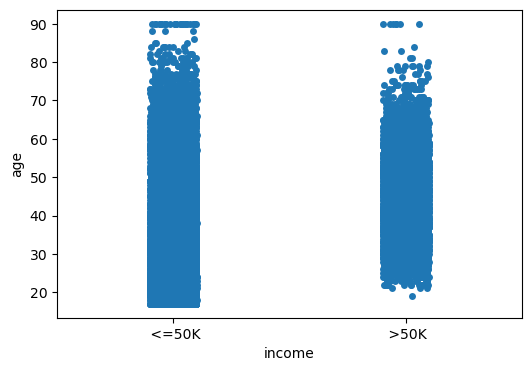

In [29]:
f = plt.pyplot.figure(figsize=(6, 4))

sns.stripplot(x = 'income', y = 'age', data = adult_data)

##### Findings
- The data is spread out too evenly and it is difficult to gather any concrete observation from it
- People with `age` between 20 and 70 seem to be more likely to have income >50k

##### Perform
- Binning can be used to analyse it much more easily in a heatmap with each group catergorised per 10 years of age

#### 5.4.3. fnlwgt vs income

<Axes: xlabel='income', ylabel='fnlwgt'>

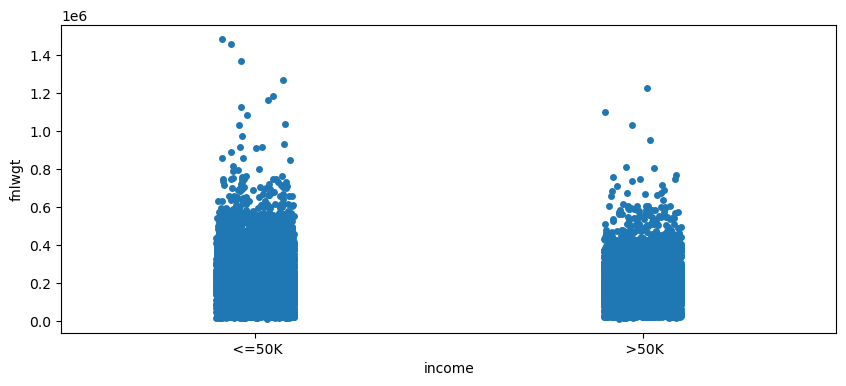

In [30]:
f = plt.pyplot.figure(figsize=(10, 4))

sns.stripplot(x = 'income', y = 'fnlwgt', data = adult_data)

##### Findings
- The data is spread out too evenly and it is difficult to gather any observation from it

##### Perform
- Drop fnlwgt from dataframe

#### 5.4.4. education-num vs income

<Axes: xlabel='income', ylabel='education-num'>

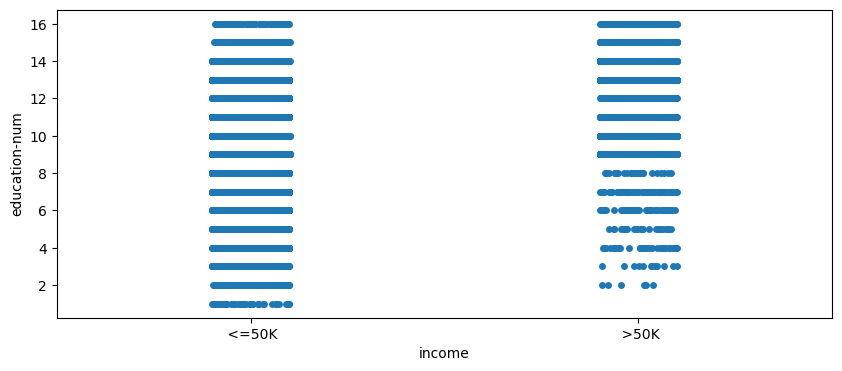

In [31]:
f = plt.pyplot.figure(figsize=(10, 4))

sns.stripplot(x = 'income', y = 'education-num', data = adult_data)

##### Findings
- The data is spread out too evenly and it is difficult to gather any concrete observation from it
- Data felt more like a catergorical variable than a numerical variable

##### Perform
- Analysis with similar variable(`education`) to be compared

#### 5.4.5. capital-gain vs income

<Axes: xlabel='income', ylabel='capital-gain'>

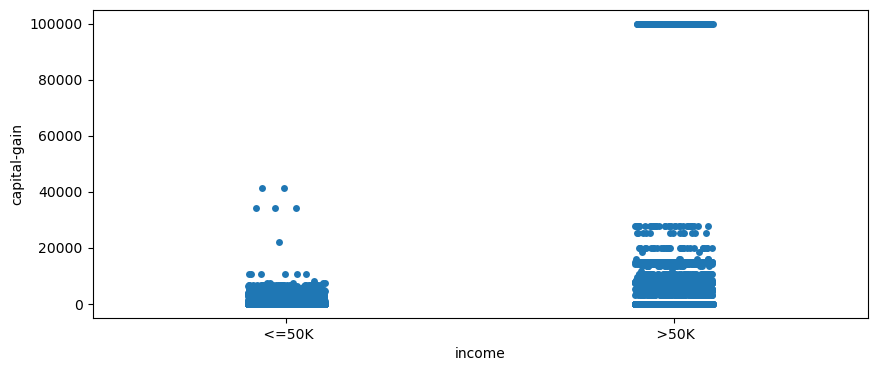

In [32]:
f = plt.pyplot.figure(figsize=(10, 4))

sns.stripplot(x = 'income', y = 'capital-gain', data = adult_data)

##### Findings
- Income with >50k has more capital gain on average
- 100000 capital-gain is a 100% gurantee for income >50k

##### Perform
- Binning would be required to analyse it much more easily in a heatmap

#### 5.4.6. capital-loss vs income

<Axes: xlabel='income', ylabel='capital-loss'>

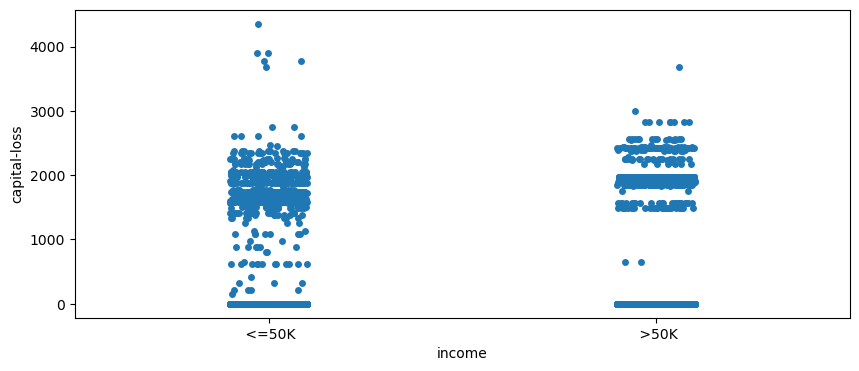

In [33]:
f = plt.pyplot.figure(figsize=(10, 4))

sns.stripplot(x = 'income', y = 'capital-loss', data = adult_data)

##### Findings
- The data is spread out more evenly compared to `capital-gain` and it is more difficult to gather any observation from it
- When capital-loss is between 1000 to 1500 there does not seem to be any >50k

##### Perform
- Binning would be required to analyse it much more easily in a heatmap

#### 5.4.7. workclass vs income

<Axes: xlabel='income', ylabel='workclass'>

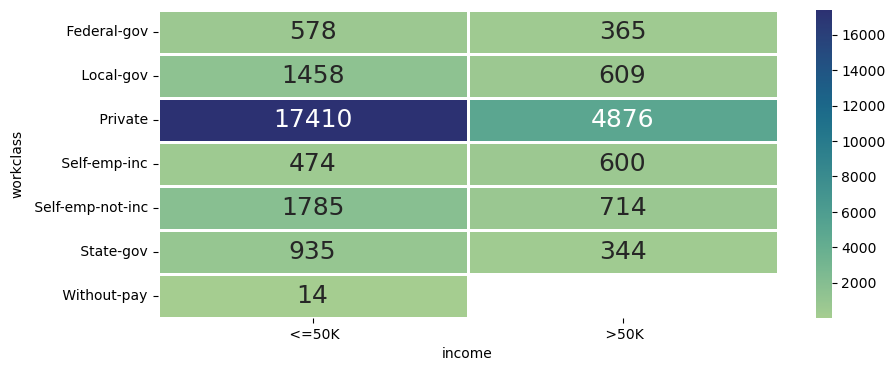

In [34]:
f = plt.pyplot.figure(figsize=(10, 4))
sns.heatmap(adult_data.groupby(['workclass', 'income']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest")

#### Findings
- Without Pay is always below <= 50k as income is virtually 0
- workclass is a good indicator as it is not distributed equally showing that workclass has weight in terms of determining income
- Local-Gov, Federal-Gov, and State-Gov have similar spread and are under public sector and as such can be catergorised in the same group
- Self-emp-inc is the only variable to skew towards >50k

#### Perform
- Encode `workclass` by combining local-gov, federal-gov and state-gov into public

#### 5.4.8. education vs income

<Axes: xlabel='income', ylabel='education'>

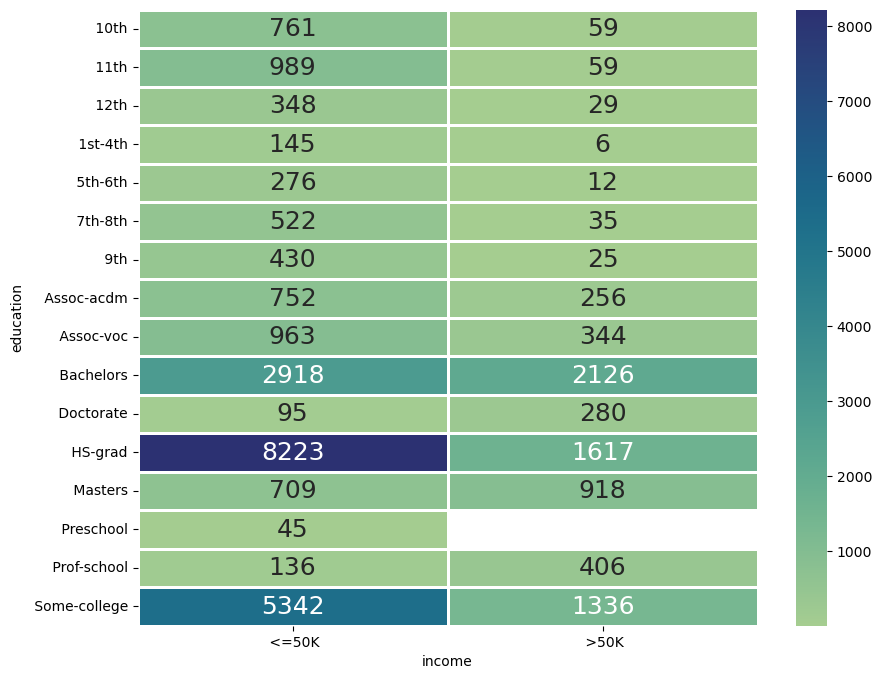

In [35]:
f = plt.pyplot.figure(figsize=(10, 8))
sns.heatmap(adult_data.groupby(['education', 'income']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest")

#### Findings
- Bachelors is relatively evenly distributed
- Prof-school, Masters and Doctorate skew towards > 50k
- Pre-School, 1st to 12th grade school is skewed towards <50k
- assoc-acdm, assoc-voc and some college is relatively skewed towards <50k

#### Perform
- Encode `education` into 3 different category as post-bachelor, pre-college, college

#### 5.4.9. marital-status vs income

<Axes: xlabel='income', ylabel='marital-status'>

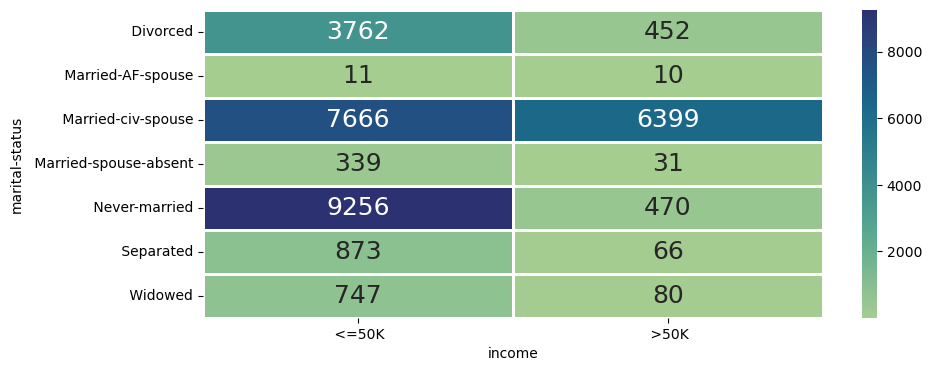

In [36]:
f = plt.pyplot.figure(figsize=(10, 4))
sns.heatmap(adult_data.groupby(['marital-status', 'income']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest")

#### Findings
- Data is mostly skewed towards <= 50k for all values.
- Married-civ-spouse is the most evenly distributed and taking up the frequently occured value.
- Divorced, Never Married, Separated, Widowed & married-spouse-absent are very skewed towards <= 50k and can be catergorised together under single
- Married-AF-spouse and Married-civ-spouse is evenly distributed and can be catergorised under married

#### Perform
- Encode `marital-status` by putting married-af-spouse and married-civ-spouse under married and the others as single

#### 5.4.10. occupation vs income

<Axes: xlabel='income', ylabel='occupation'>

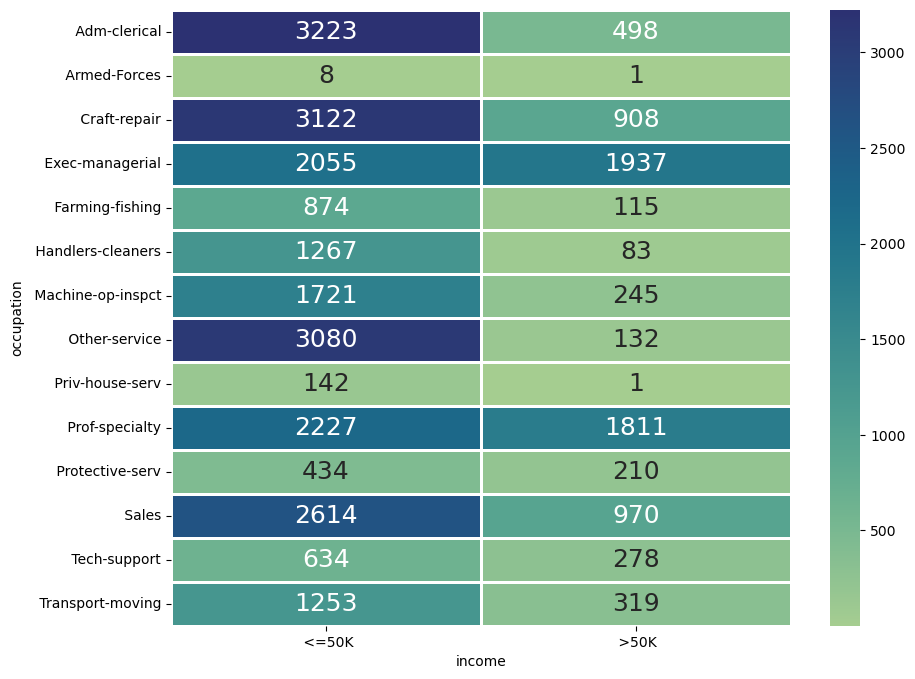

In [37]:
f = plt.pyplot.figure(figsize=(10, 8))
sns.heatmap(adult_data.groupby(['occupation', 'income']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest")

#### Findings
- Data is mostly skewed towards <= 50k for all values.
- Exec-Managerial is the most evenly distributed and taking up the frequently occured value.

#### 5.4.11. relationship vs income

<Axes: xlabel='income', ylabel='relationship'>

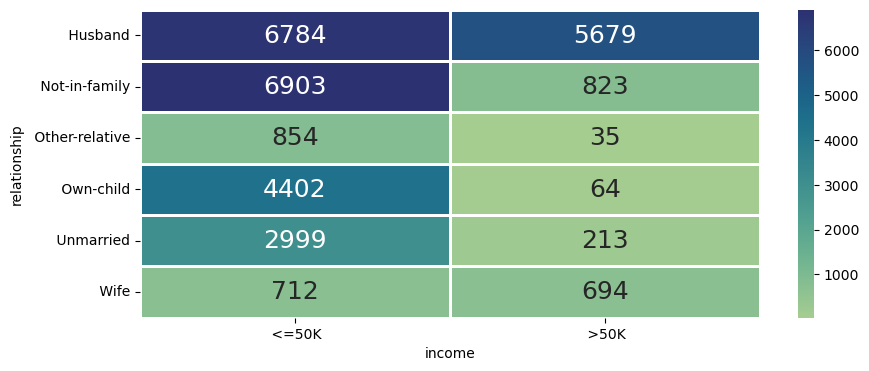

In [38]:
f = plt.pyplot.figure(figsize=(10, 4))
sns.heatmap(adult_data.groupby(['relationship', 'income']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest")

#### Findings
- Data is mostly skewed towards <= 50k for all values however there are 2 values where the data is not skewed.
- Husband and wife is the most evenly distributed with almost half of the values skewed towards >50k as such can be caterogrised together
- The other variables can be catergorised together

#### Perform
- Encode `relationship` by catergorising husband and wife as married and other values as others

#### 5.4.12. race vs income

<Axes: xlabel='income', ylabel='race'>

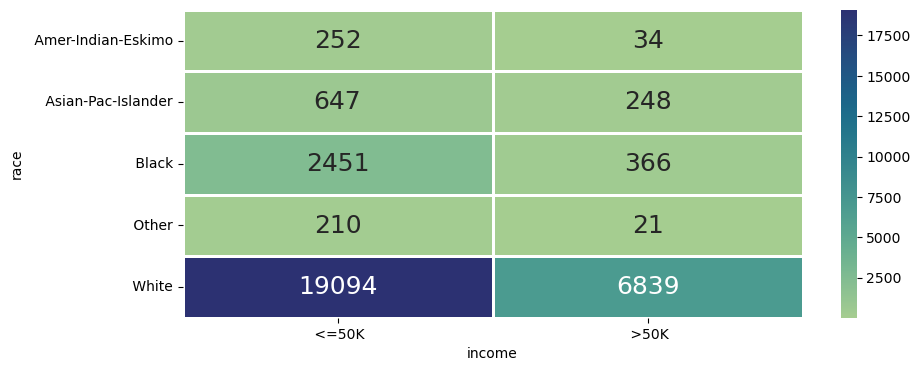

In [39]:
f = plt.pyplot.figure(figsize=(10, 4))
sns.heatmap(adult_data.groupby(['race', 'income']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest")

#### Findings
- Data is mostly skewed towards <= 50k for all values. 
- For white where by majority of the > 50k belonging to white.

#### Perform
- Encode `race` where white is its own group and the other values are being encoded as others

#### 5.4.13. sex vs income

<Axes: xlabel='income', ylabel='sex'>

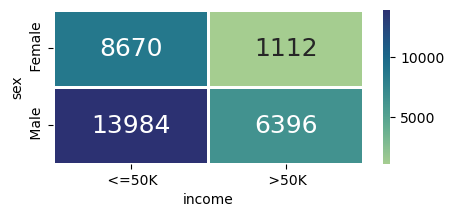

In [40]:
f = plt.pyplot.figure(figsize=(5, 2))
sns.heatmap(adult_data.groupby(['sex', 'income']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest")

#### Findings
- Data is mostly skewed towards <= 50k for all values.
- Only notable finding is male has a higher probability to be >50k over female.

#### Perform
- More EDA needs to be performed with multivariate.

#### 5.4.14. native-country vs income

<Axes: xlabel='income', ylabel='native-country'>

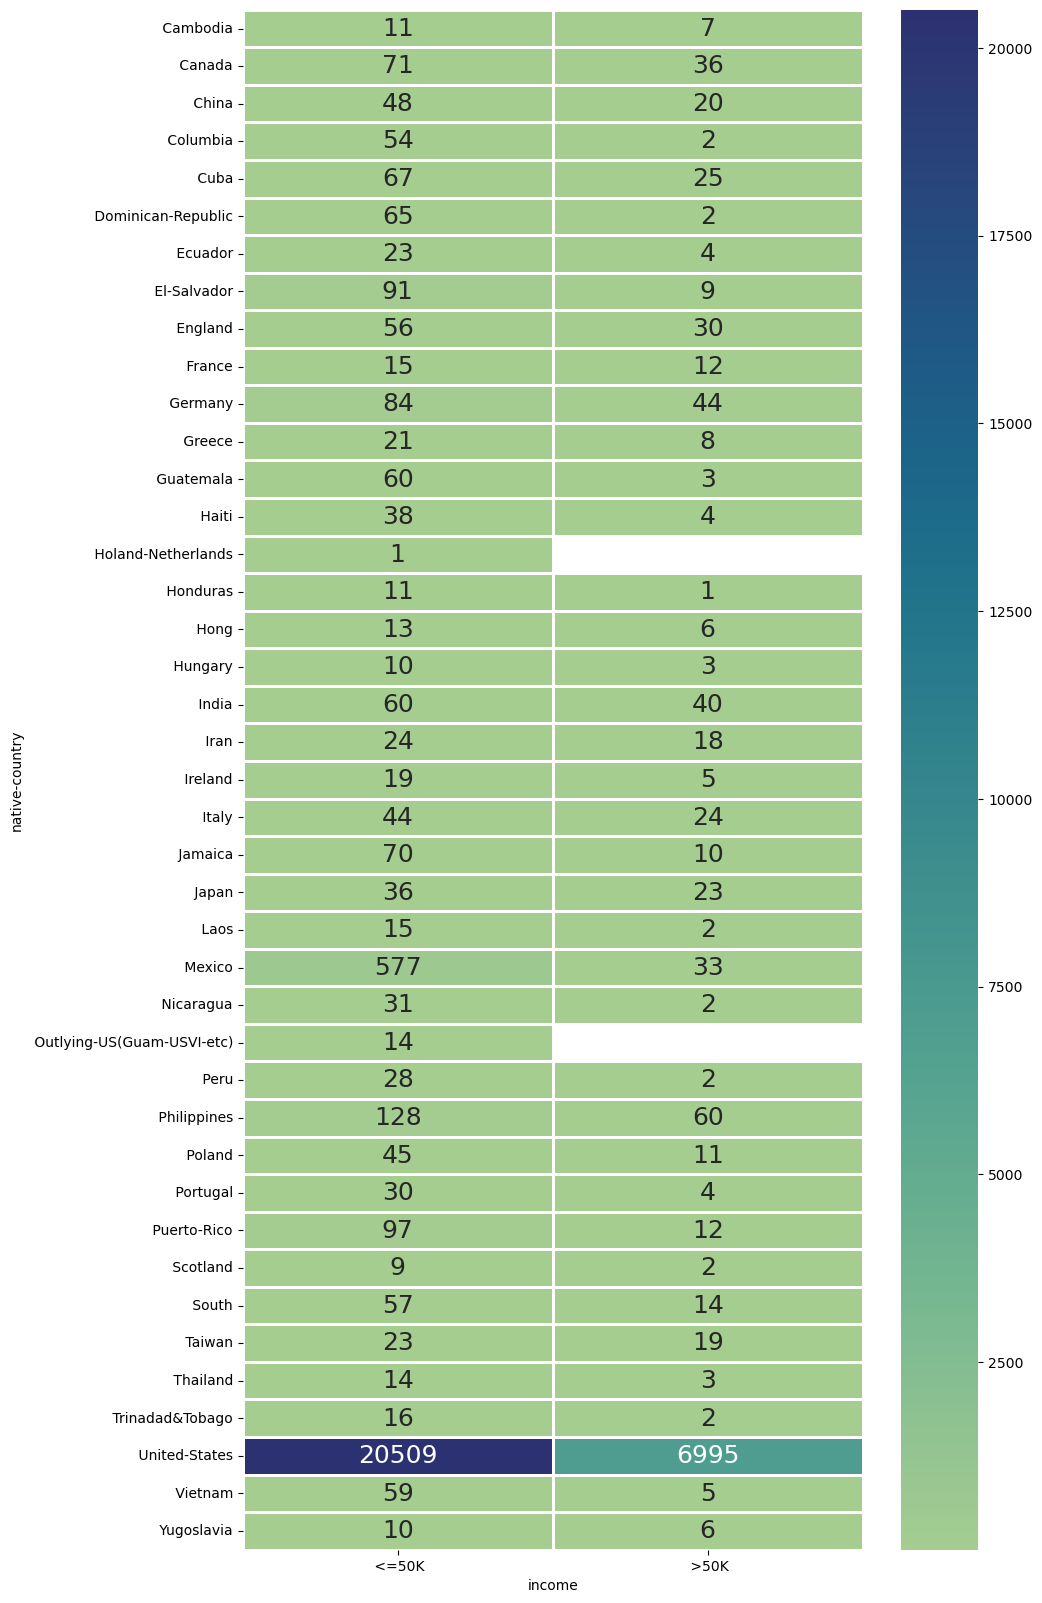

In [41]:
f = plt.pyplot.figure(figsize=(10, 20))
sns.heatmap(adult_data.groupby(['native-country', 'income']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest")

#### Findings
- Data is mostly skewed towards <= 50k for all values
- US contains the most amount of values
- Taiwan/japan/iran where the data is the most evenly distributed.
- Outlying-US where there are no data above >50k

#### Perform
- Encode `native-country` by putting US as its own value and other countries as others

### 5.5. Multivariable vs Income Relationship Analysis

#### 5.5.1. Sex vs Occupation vs Income

[Text(0.5, 1.0, 'Female')]

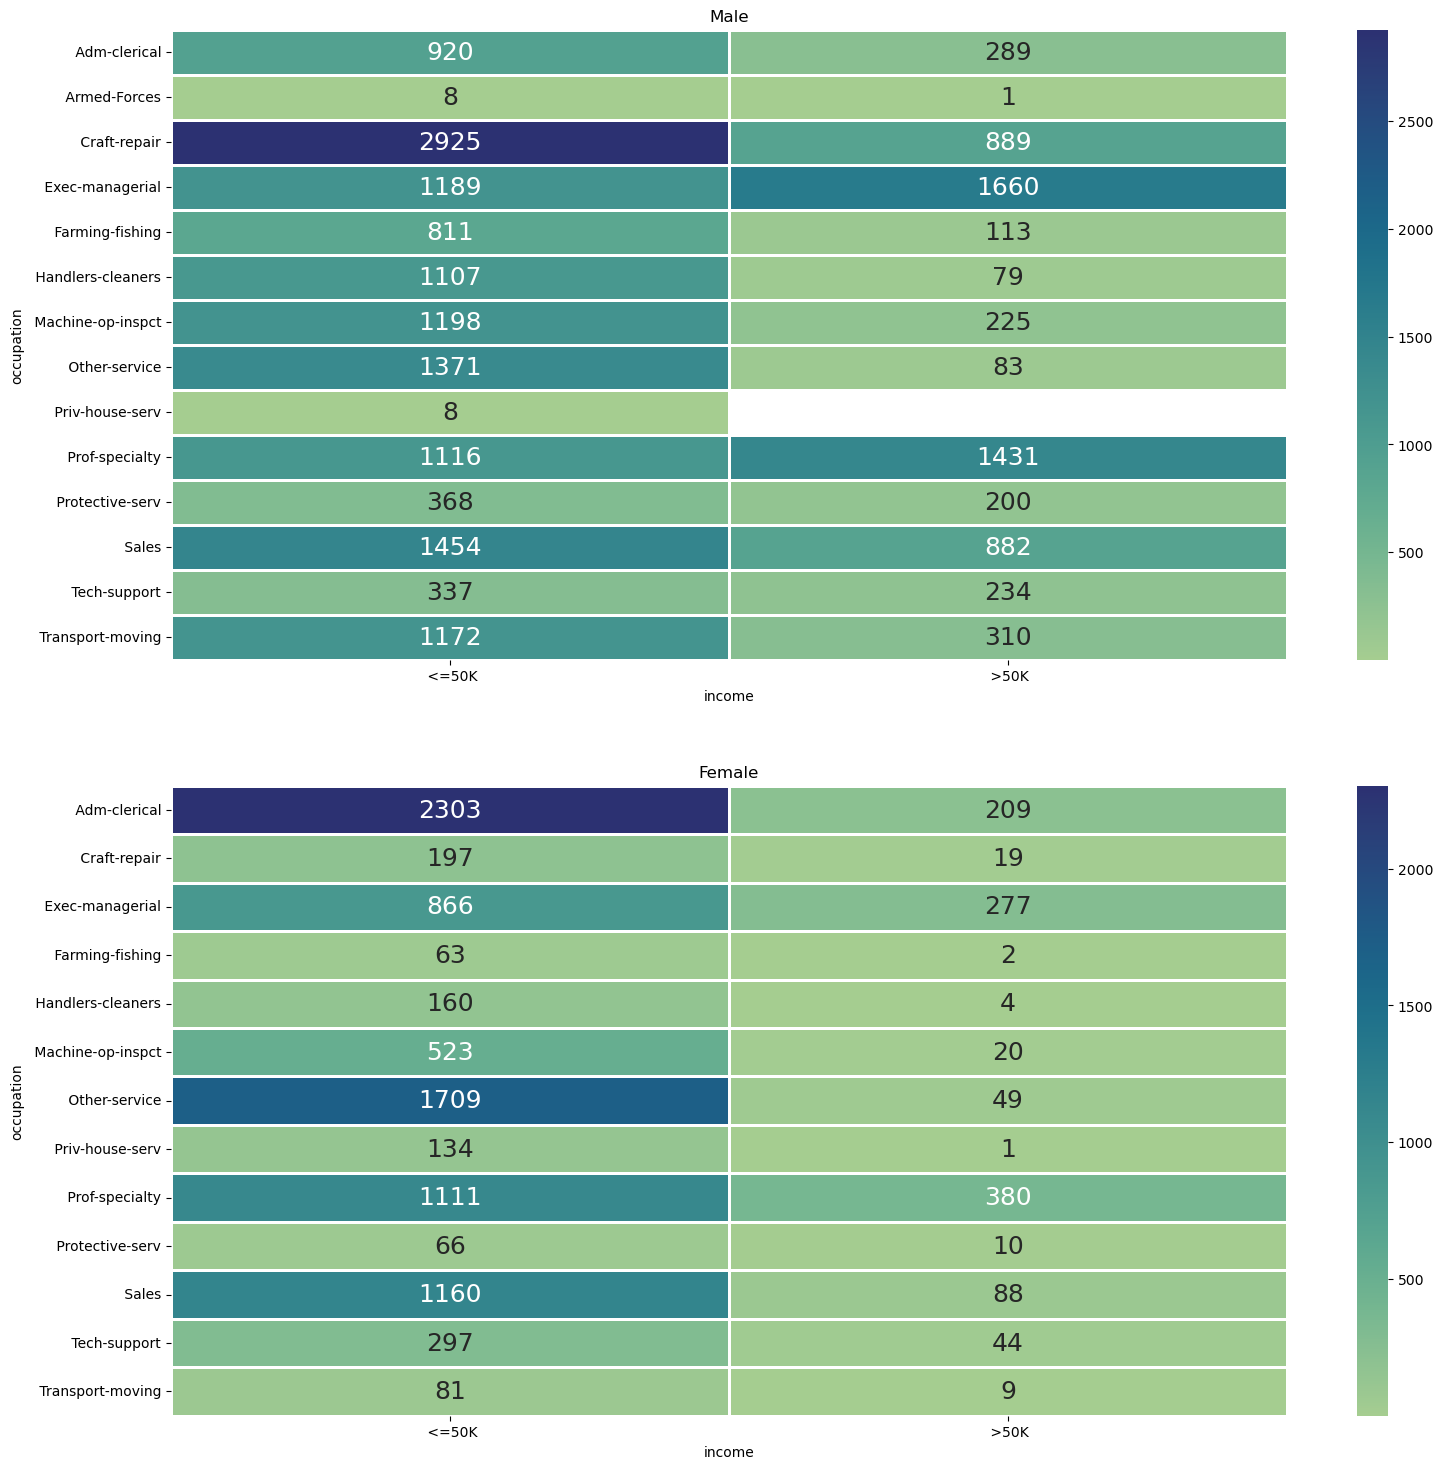

In [42]:
adult_data_M = adult_data[adult_data["sex"] == ' Male']
adult_data_F = adult_data[adult_data["sex"] == ' Female']
f, axes = plt.pyplot.subplots(2, 1, figsize=(18, 18))
sns.heatmap(adult_data_M.groupby(['occupation', 'income']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest",ax=axes[0]).set(title='Male')
sns.heatmap(adult_data_F.groupby(['occupation', 'income']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest",ax=axes[1]).set(title='Female')

##### Findings
- Exec-Managerial, Prof-Speciality & Sales is different for male and female for spread of data of income
- Might show that females in that field of work are generally not >50k and therefore has a weight

#### 5.5.2. Sex vs Workclass vs Income

[Text(0.5, 1.0, 'Female')]

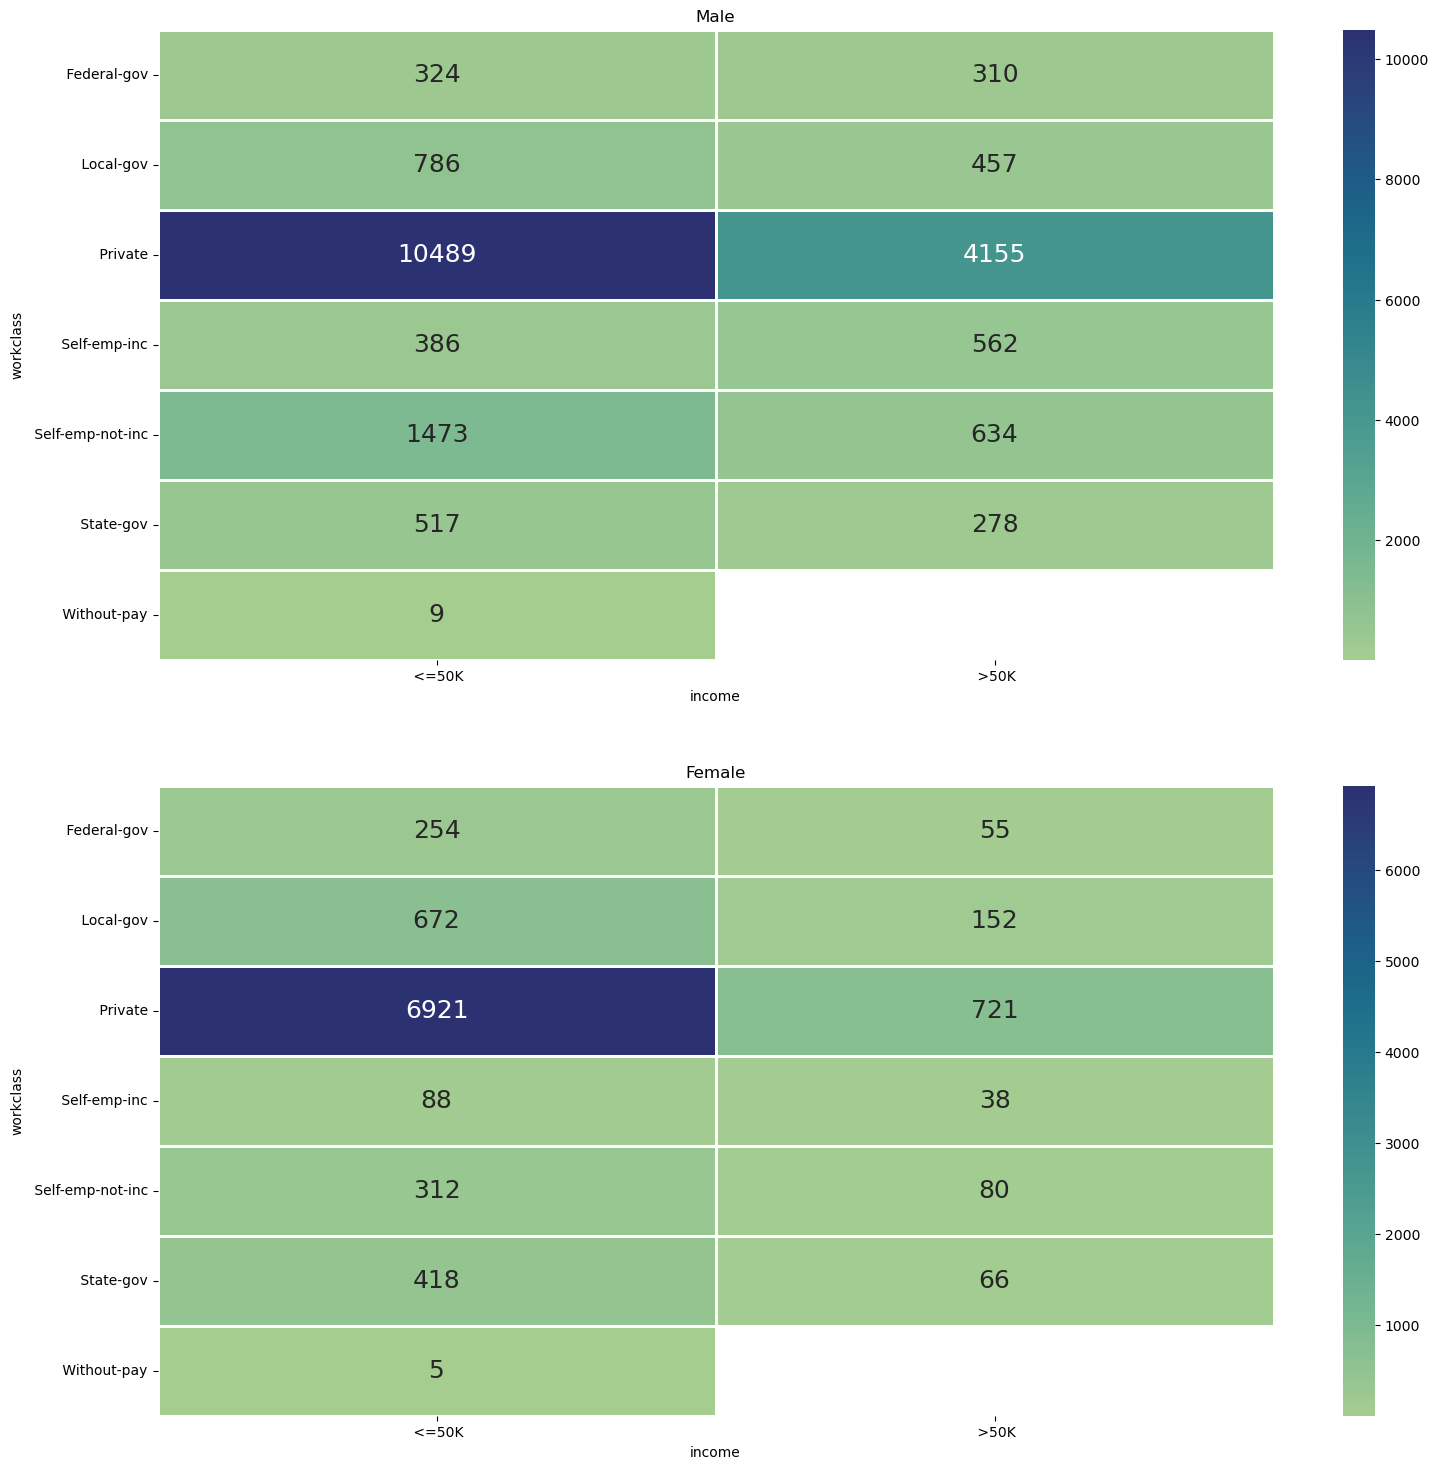

In [43]:
f, axes = plt.pyplot.subplots(2, 1, figsize=(18, 18))
sns.heatmap(adult_data_M.groupby(['workclass', 'income']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest",ax=axes[0]).set(title='Male')
sns.heatmap(adult_data_F.groupby(['workclass', 'income']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest",ax=axes[1]).set(title='Female')

##### Findings
- The ratio of <= 50k : > 50k is much higher for most data when comparing male to female
- This shows gender is a important variable as such would not need to be dropped

### 5.6. Miscallenous Relationship Analysis

#### 5.6.1 education vs education-num

<Axes: xlabel='education-num', ylabel='education'>

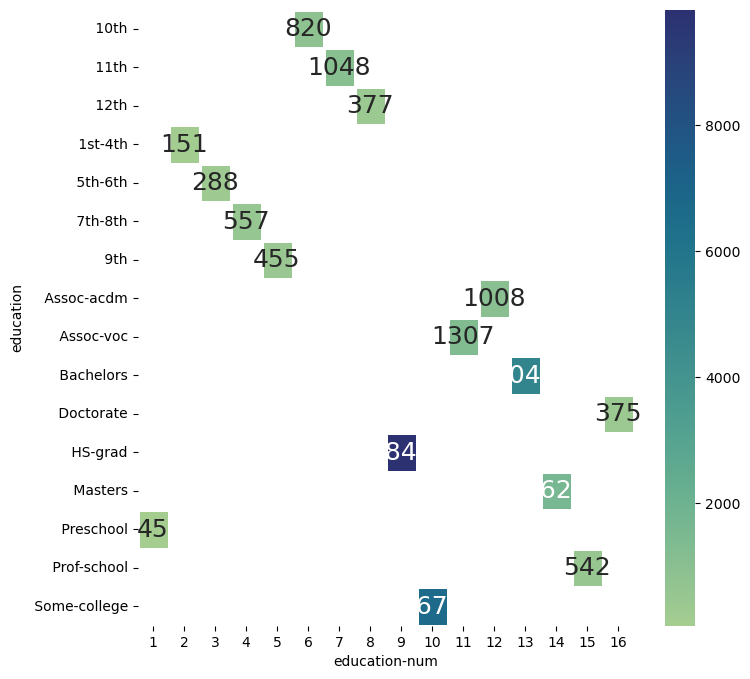

In [44]:
f = plt.pyplot.figure(figsize=(8, 8))

sns.heatmap(adult_data.groupby(['education', 'education-num']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "crest")

#### Findings
- There are a total of 16 unique boxes with its count corresponding correctly to `education`, as such I can conclude `education-num` is the encoded version of `education`.
- The encoded values are
    - Preschool: 1
    - 1st-4th: 2
    - 5th-6th: 3
    - 7th-8th: 4
    - 9th: 5
    - 10th: 6
    - 11th: 7
    - 12th: 8
    - HS-Grad: 9
    - Some-College: 10
    - Assoc-voc: 11
    - Assoc-acdm: 12
    - Bachelors: 13
    - Masters: 14
    - Prof-school: 15
    - Doctorate: 16

#### Perform
- Remove `education` in FE as we would be encoding all catergorical features to numeric catergory eventually
- Encode `education-num` based on previous findings in `5.4.8. education vs income`
- Encoding `education-num` can be done where by 1 to 9 is HS-And-Below, 10 to 12 as College, 13 to 16 as Bachelors and above 

In [45]:
"""
things to minimally do in EDA:
1. find out education-num is mapped education
2. find out fnlwgt doesnt affect label (probs use corr or something).
MORE but idk what yet.
"""

'\nthings to minimally do in EDA:\n1. find out education-num is mapped education\n2. find out fnlwgt doesnt affect label (probs use corr or something).\nMORE but idk what yet.\n'

In [46]:
# I aint gonna touch zhabor anytime soon - jc
# I want to explore relationship with zhabor - mk

## Chapter 6. Feature Engineering

Perform (based on notes collected in earlier chapters):
- One-hot encode all categorical variables: </br>
  `workclass`, `marital-status`,
  `occupation`, `relationship`, `race`, `sex`, `native-country`, and `income`.
- Drop `fnlwgt` and `education`.
- NOTE: NOT SURE IF WE BINNING AND NOTE, WE NEED TO USE EDA TO explain why we group the values

### 6.1. Encode `workclass`

In [47]:
# Check the spread and all the possible values of the feature.
adult_data["workclass"].value_counts()

workclass
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64

#### Judging from the spread, we can further group this feature to: 
- "Private" <br>[from " Private"]
- "Public" <br>[from " Local-gov", " State-gov", " Federal-gov"]
- "Self-Employed" <br>[from " Self-emp-not-inc", " Self-emp-inc"]
- "Others" <br>[from " Without-pay"].

#### Then, we can encode these to nominal numeric values. 

In [48]:
# Define the mapping dictionary.
workclass_dict = {
    " Without-pay": 0, 
    " Private": 1, 
    " Self-emp-not-inc": 2, " Self-emp-inc": 2, 
    " Local-gov": 3, " State-gov": 3, " Federal-gov" : 3
}

# Replace values using the mapping dictionary.
adult_data["workclass"] = adult_data["workclass"].replace(workclass_dict)

# Check.
adult_data["workclass"].value_counts()

workclass
1    22286
3     4289
2     3573
0       14
Name: count, dtype: int64

### 6.2. Encode `marital-status`

In [49]:
# Check the spread and all the possible values of the feature.
adult_data["marital-status"].value_counts()

marital-status
 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: count, dtype: int64

#### Judging from the spread, we can further group this feature to: 
- "Single" <br>[from " Never-married", " Divorced", " Separated", " Widowed"]
- "Married" <br>[from " Married-civ-spouse"," Married-spouse-absent"," Married-AF-spouse"]

#### Then, we can encode "Single" to 0, and "Married" to 1 (nominal numeric values). 

In [50]:
# Define the mapping dictionary.
marital_dict = {
    " Never-married" : 0, " Divorced" : 0, " Separated" : 0, " Widowed" : 0,
    " Married-civ-spouse" : 1," Married-spouse-absent" : 1," Married-AF-spouse" : 1
}

# Replace values using the mapping dictionary.
adult_data["marital-status"] = adult_data["marital-status"].replace(marital_dict)

# Check.
adult_data["marital-status"].value_counts()

marital-status
0    15706
1    14456
Name: count, dtype: int64

### 6.3. Encode `occupation`

In [51]:
# Check the spread and all the possible values of the feature.
adult_data["occupation"].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [52]:
#### NEED Explanation


In [53]:
# need to think/EDA first.

### 6.4. Encode `relationship`

In [54]:
# Check the spread and all the possible values of the feature.
adult_data["relationship"].value_counts()

relationship
 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: count, dtype: int64

#### Judging from the spread, we can further group this feature to: 
- "Married" <br>[from " Husband"," Wife"]
- "Others" <br>[from " Not-in-family", " Own-child", " Unmarried", " Other-relative"]

#### Then, we can encode "Married" to 1, and "Others" to 1 (nominal numeric values). 

In [55]:
# Replace values.
adult_data["relationship"] = adult_data["relationship"].apply(lambda x: 1 if " Husband" in x or " Wife" in x else 0)

# Check.
adult_data["relationship"].value_counts()

relationship
0    16293
1    13869
Name: count, dtype: int64

### 6.5. Encode `race`

In [56]:
# Check the spread and all the possible values of the feature.
adult_data["race"].value_counts()

race
 White                 25933
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: count, dtype: int64

#### Judging from the spread, we can further group this feature to: 
- "White" <br>[from " White"]
- "Others" <br>[from " Black", " Asian-Pac-Islander", " Amer-Indian-Eskimo", " Other"]

#### Then, we can encode "White" to 1, and "Others" to 0 (nominal numeric values).). 

In [57]:
# Replace values.
adult_data["race"] = adult_data["race"].apply(lambda x: 1 if " White" in x else 0)

# Check.
adult_data["race"].value_counts()

race
1    25933
0     4229
Name: count, dtype: int64

### 6.6. Encode `sex`

In [58]:
# Check the spread and all the possible values of the feature.
adult_data["sex"].value_counts()

sex
 Male      20380
 Female     9782
Name: count, dtype: int64

#### Simply map to nominal numeric values [" Male" = 0, " Female" = 1].

In [59]:
# Map values.
adult_data["sex"] = adult_data["sex"].map({" Male": 0, " Female": 1}) 

# Check.
adult_data["sex"].value_counts()

sex
0    20380
1     9782
Name: count, dtype: int64

### 6.7. Encode `native-country`

In [60]:
# Check the spread and all the possible values of the feature.
adult_data["native-country"].value_counts()

native-country
 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                

#### Judging from the spread, we can further group this feature to: 
- "US" <br>[from " United-States"]
- "Others" <br>[from all other values]

#### Then, we can encode "US" to 1, and "Others" to 0 (nominal numeric values).

In [61]:
# Replace values.
adult_data["native-country"] = adult_data["native-country"].apply(lambda x: 1 if " United-States" in x else 0)

# Check.
adult_data["native-country"].value_counts()

native-country
1    27504
0     2658
Name: count, dtype: int64

### 6.8. Encode `education-num`

In [62]:
# Define the mapping dictionary.
education_num_dict = {
    1 : 0, 2 : 0, 3 : 0, 4 : 0,
    5 : 0, 6 : 0, 7 : 0, 8 : 0, 9 : 0, 10 : 1, 11 : 1, 12 : 1,13 : 2,14 : 2,15 : 2,16 : 2
}

# Replace values using the mapping dictionary.
adult_data["education-num"] = adult_data["education-num"].replace(education_num_dict)

# Check.
adult_data["education-num"].value_counts()

education-num
0    13581
1     8993
2     7588
Name: count, dtype: int64

### 6.9. Encode `income`

In [63]:
# Check the spread and all the possible values of the label.
adult_data["income"].value_counts()

income
 <=50K    22654
 >50K      7508
Name: count, dtype: int64

#### Simply map to nominal numeric values [" <=50K" = 0, " >50K" = 1].

In [64]:
# Map values.
adult_data["income"] = adult_data["income"].map({" <=50K": 0, " >50K":1}) 

# Check.
adult_data["income"].value_counts()

income
0    22654
1     7508
Name: count, dtype: int64

### 6.10. Binning `age`

In [65]:
#Bin Values
bins = [0,20,30,40,50,60,70,100]
lbs = [0,1,2,3,4,5,6]
adult_data['age'] = pd.cut(adult_data['age'], bins,labels = lbs)

#Check
adult_data["age"].value_counts()

age
2    8163
1    7599
3    6710
4    3886
0    1998
5    1422
6     384
Name: count, dtype: int64

### 6.11. Binning `capital-gain`

In [66]:
#Bin Values
bins = [0,10000,20000,30000,50000,100000]
lbs = [0,1,2,3,4]
adult_data['capital-gain'] = pd.cut(adult_data['capital-gain'], bins,labels = lbs)

#Check
adult_data["capital-gain"].value_counts()

capital-gain
0    1806
1     500
4     148
2      79
3       5
Name: count, dtype: int64

### 6.12. Binning `capital-loss`

In [67]:
#Bin Values
bins = [0,1000,2000,3000,5000]
lbs = [0,1,2,3]
adult_data['capital-loss'] = pd.cut(adult_data['capital-loss'], bins,labels = lbs)

#Check
adult_data["capital-loss"].value_counts()

capital-loss
1    1098
2     287
0      34
3       8
Name: count, dtype: int64

### 6.11. Drop Redundant Features

In [68]:
adult_data = adult_data.drop(
    ["fnlwgt", 'education'], axis=1)

## Chapter 7. EDA Part 2

## Chapter 8. Modelling

In [69]:
# Do this in week 9.

In [70]:
adult_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,2,3,2,0,Adm-clerical,0,1,0,0,NaN,40,1,0
1,3,2,2,1,Exec-managerial,1,1,0,NaN,NaN,13,1,0
2,2,1,0,0,Handlers-cleaners,0,1,0,NaN,NaN,40,1,0
3,4,1,0,1,Handlers-cleaners,1,0,0,NaN,NaN,40,1,0
4,1,1,2,1,Prof-specialty,1,0,1,NaN,NaN,40,0,0
